<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/unsupervised_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

LOADING OF DATASET

In [2]:
df = pd.read_csv('/content/adult_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.
48839,38.0,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K.
48840,44.0,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K.


EXPLORATORY ANALYSIS

In [3]:
df.duplicated().sum()

np.int64(16)

In [4]:
df1 = df.drop_duplicates()

In [5]:
df1.isna().sum()

,0
age,2442
workclass,3362
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48826 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46384 non-null  float64
 1   workclass       45464 non-null  object 
 2   fnlwgt          48826 non-null  int64  
 3   education       48826 non-null  object 
 4   education-num   48826 non-null  int64  
 5   marital-status  48826 non-null  object 
 6   occupation      45469 non-null  object 
 7   relationship    48826 non-null  object 
 8   race            48826 non-null  object 
 9   sex             48826 non-null  object 
 10  capital-gain    48826 non-null  int64  
 11  capital-loss    48826 non-null  int64  
 12  hours-per-week  46384 non-null  float64
 13  native-country  46121 non-null  object 
 14  income          48826 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [7]:
num_cols = df1.select_dtypes(include=('float64','int64'))
num_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


In [8]:
df1['fnlwgt'].value_counts()

,count
fnlwgt,
203488,21
190290,19
120277,19
126569,18
125892,18
...,...
205883,1
268205,1
113735,1


In [9]:
df1['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', '?', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [10]:
df1['occupation'].value_counts()

,count
occupation,
Prof-specialty,5851
Craft-repair,5790
Exec-managerial,5770
Adm-clerical,5328
Sales,5231
Other-service,4654
Machine-op-inspct,2872
Transport-moving,2238
Handlers-cleaners,1976


In [11]:
df1['workclass'].value_counts()

,count
workclass,
Private,32205
Self-emp-not-inc,3649
Local-gov,2973
State-gov,1877
?,1763
Self-emp-inc,1624
Federal-gov,1346
Without-pay,18
Never-worked,9


MISSING VALUE HANDLING

In [12]:
df1['occupation'] = df1['occupation'].replace('?',np.nan);

/tmp/ipython-input-3275820731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['occupation'] = df1['occupation'].replace('?',np.nan);


In [13]:
df1 = df1.replace('?',np.nan)

In [14]:
df1.isna().sum()

,0
age,2442
workclass,5125
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0


In [15]:
filtered_df = df1[(df1['occupation'] == 'Armed-Forces') & (df1['workclass'] .isna())]
filtered_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
46014,23.0,NaN,190290,HS-grad,9,Never-married,Armed-Forces,Own-child,White,Male,0,0,40.0,United-States,<=50K.


In [16]:
df1.loc[df1['workclass'].isna() & (df['occupation'] == 'Armed-Forces'), 'workclass'] = 'Federal-gov'


In [17]:
df1[df1['occupation']=='Armed-Forces'].isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [18]:
df1['native-country'].unique()

array([nan, 'United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Columbia', 'Cambodia', 'Thailand',
       'Canada', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'Poland', 'France',
       'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [19]:
df1.loc[df1['native-country'].isna() & (df['occupation'] == 'Armed-Forces'), 'native-country'] = 'United-States'

In [20]:
df1[df1['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18.0,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40.0,United-States,<=50K
10845,23.0,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35.0,United-States,<=50K
14772,17.0,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30.0,United-States,<=50K
20337,18.0,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10.0,United-States,<=50K
23232,20.0,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40.0,United-States,<=50K
32304,NaN,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40.0,United-States,<=50K
32314,18.0,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4.0,United-States,<=50K
41346,17.0,Never-worked,131593,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20.0,United-States,<=50K.
46459,18.0,Never-worked,162908,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35.0,United-States,<=50K.


In [21]:
df1.loc[df1['occupation'].isna() & (df['workclass'] == 'Never-worked'), 'occupation'] = 'No-Occupation'

In [22]:
df1[df1['workclass']=='Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18.0,Never-worked,206359,10th,6,Never-married,No-Occupation,Own-child,White,Male,0,0,40.0,United-States,<=50K
10845,23.0,Never-worked,188535,7th-8th,4,Divorced,No-Occupation,Not-in-family,White,Male,0,0,35.0,United-States,<=50K
14772,17.0,Never-worked,237272,10th,6,Never-married,No-Occupation,Own-child,White,Male,0,0,30.0,United-States,<=50K
20337,18.0,Never-worked,157131,11th,7,Never-married,No-Occupation,Own-child,White,Female,0,0,10.0,United-States,<=50K
23232,20.0,Never-worked,462294,Some-college,10,Never-married,No-Occupation,Own-child,Black,Male,0,0,40.0,United-States,<=50K
32304,NaN,Never-worked,176673,HS-grad,9,Married-civ-spouse,No-Occupation,Wife,Black,Female,0,0,40.0,United-States,<=50K
32314,18.0,Never-worked,153663,Some-college,10,Never-married,No-Occupation,Own-child,White,Male,0,0,4.0,United-States,<=50K
41346,17.0,Never-worked,131593,11th,7,Never-married,No-Occupation,Own-child,Black,Female,0,0,20.0,United-States,<=50K.
46459,18.0,Never-worked,162908,11th,7,Never-married,No-Occupation,Own-child,White,Male,0,0,35.0,United-States,<=50K.


In [23]:
df1.isna().sum()

,0
age,2442
workclass,5124
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5106
relationship,0
race,0
sex,0


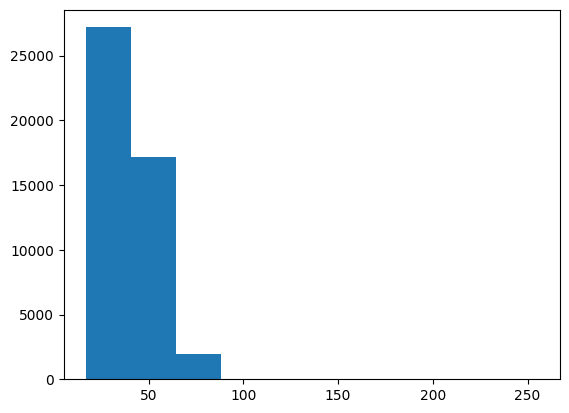

In [24]:
plt.hist(df1['age']);

In [25]:
df3 = df1[df1['native-country']=='Jamaica']
df3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
706,40.0,Private,229148,12th,8,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,40.0,Jamaica,<=50K
1135,NaN,Private,184307,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50.0,Jamaica,>50K
1570,19.0,NaN,62534,Bachelors,13,Never-married,NaN,Own-child,Black,Female,0,0,40.0,Jamaica,<=50K
2006,NaN,Private,185072,Some-college,10,Never-married,Adm-clerical,Other-relative,Black,Female,0,0,40.0,Jamaica,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,36.0,Local-gov,322770,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,1887,40.0,Jamaica,>50K.
46232,28.0,Private,186672,HS-grad,9,Never-married,Adm-clerical,Not-in-family,Black,Male,0,0,40.0,Jamaica,<=50K.
47465,51.0,Private,201062,HS-grad,9,Married-civ-spouse,Other-service,Other-relative,Black,Female,0,0,40.0,Jamaica,<=50K.
48007,47.0,Private,165539,HS-grad,9,Never-married,Prof-specialty,Not-in-family,Black,Female,4101,0,40.0,Jamaica,<=50K.


In [26]:
df3['race'].unique()

array(['Black', 'White', 'Other'], dtype=object)

In [27]:
df3[df3['native-country']=='Jamaica'].isna().sum()

,0
age,7
workclass,10
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,11
relationship,0
race,0
sex,0


In [28]:
df1[df1['occupation']=='Priv-house-serv']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
536,57.0,Private,190942,1st-4th,2,Widowed,Priv-house-serv,Not-in-family,Black,Female,0,0,30.0,United-States,<=50K
622,65.0,Private,109351,9th,5,Widowed,Priv-house-serv,Unmarried,Black,Female,0,0,NaN,United-States,<=50K
929,33.0,Private,373662,1st-4th,2,Married-spouse-absent,Priv-house-serv,Not-in-family,White,Female,0,0,40.0,Guatemala,<=50K
1038,34.0,Private,289984,HS-grad,9,Divorced,Priv-house-serv,Unmarried,Black,Female,0,0,30.0,United-States,<=50K
1990,19.0,Private,365640,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,45.0,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48157,65.0,Private,109221,7th-8th,4,Widowed,Priv-house-serv,Not-in-family,White,Female,0,3175,60.0,Puerto-Rico,<=50K.
48320,51.0,Private,27804,Some-college,10,Divorced,Priv-house-serv,Unmarried,Amer-Indian-Eskimo,Female,0,0,35.0,United-States,<=50K.
48495,84.0,Private,65478,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,40.0,England,<=50K.
48606,65.0,Private,119769,HS-grad,9,Widowed,Priv-house-serv,Unmarried,Black,Female,0,0,20.0,United-States,<=50K.


In [29]:
df1.loc[df1['workclass'].isna() & (df['occupation'] == 'Priv-house-serv'), 'workclass'] = 'Private'

In [30]:
df1.isna().sum()

,0
age,2442
workclass,5113
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,5106
relationship,0
race,0
sex,0


In [31]:
df1['native-country'].value_counts()

,count
native-country,
United-States,41610
Mexico,906
Philippines,282
Germany,194
Puerto-Rico,175
Canada,170
El-Salvador,147
India,143
Cuba,132


In [32]:
df1['age'] = df1['age'].fillna(df1['age'].median())

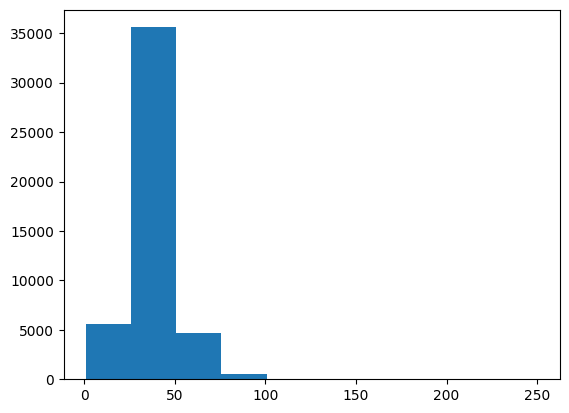

In [33]:
plt.hist(df1['hours-per-week']);

In [34]:
df1['hours-per-week'] = df1['hours-per-week'].fillna(df1['hours-per-week'].median())

In [35]:
df1['occupation'] = df1['occupation'].fillna(df1['occupation'].mode()[0])
df1['workclass'] = df1['workclass'].fillna(df1['workclass'].mode()[0])
df1['native-country'] = df1['native-country'].fillna(df1['native-country'].mode()[0])

In [36]:
df1.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


HANDLING OF OUTLIERS

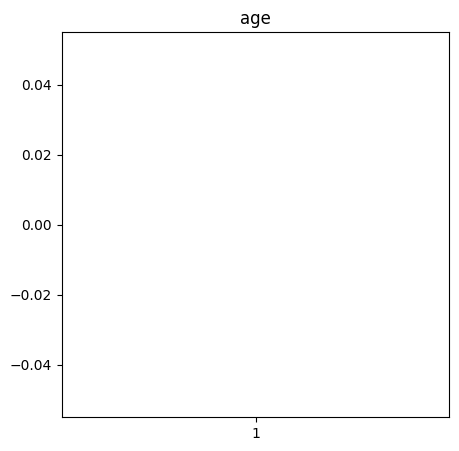

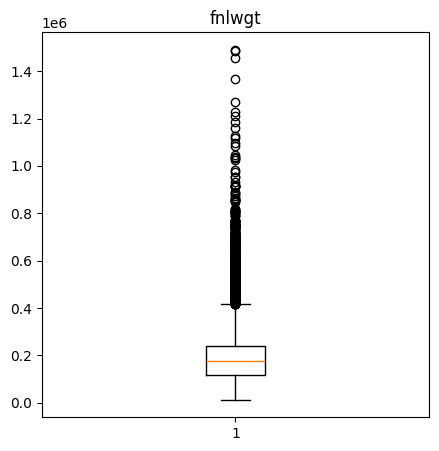

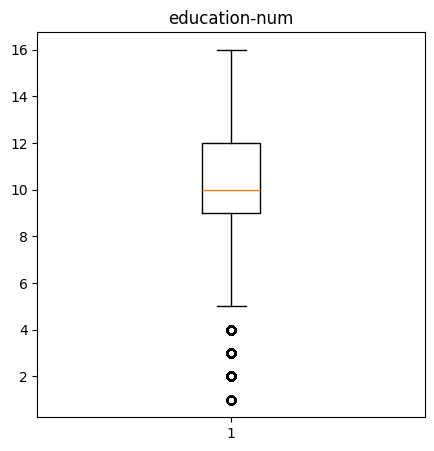

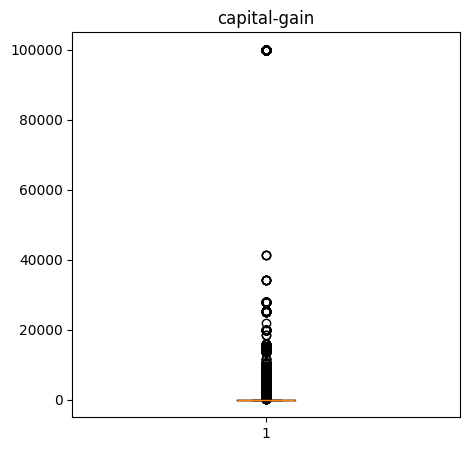

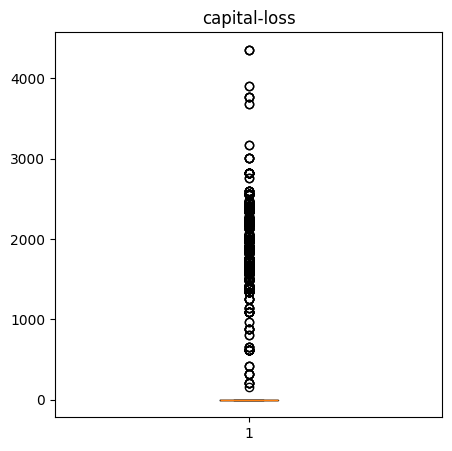

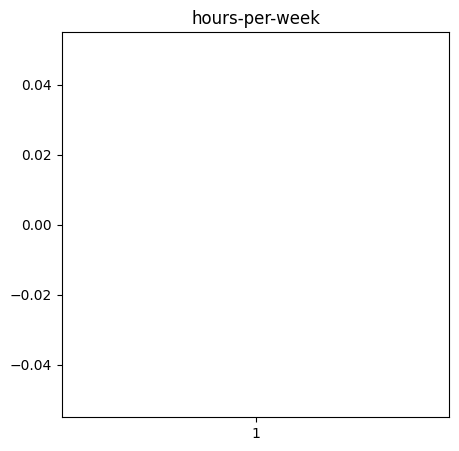

In [37]:
for i in num_cols:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(num_cols[i])

In [38]:
df1['age'] = winsorize(df1['age'],limits=(0.01,0.02))
df1['fnlwgt'] = winsorize(df1['fnlwgt'],limits=(0.01,0.03))
df1['capital-gain'] = winsorize(df1['capital-gain'],limits=(0.01,0.02))
df1['education-num'] = winsorize(df1['education-num'],limits=(0.01,0.03))
df1['capital-loss'] = winsorize(df1['capital-loss'],limits=(0.01,0.02))
df1['hours-per-week'] = winsorize(df1['hours-per-week'],limits=(0.02,0.02))

In [39]:
num_cols1 = df1.select_dtypes(include=('float64','int64'))
num_cols1

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39.0,77516,13,2174,0,40.0
1,50.0,83311,13,0,0,13.0
2,38.0,215646,9,0,0,40.0
3,53.0,234721,7,0,0,40.0
4,28.0,338409,13,0,0,40.0
...,...,...,...,...,...,...
48837,39.0,215419,13,0,0,36.0
48838,64.0,321403,9,0,0,40.0
48839,38.0,374983,13,0,0,50.0
48840,44.0,83891,13,5455,0,40.0


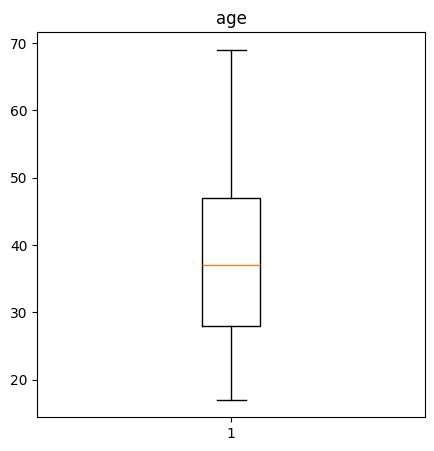

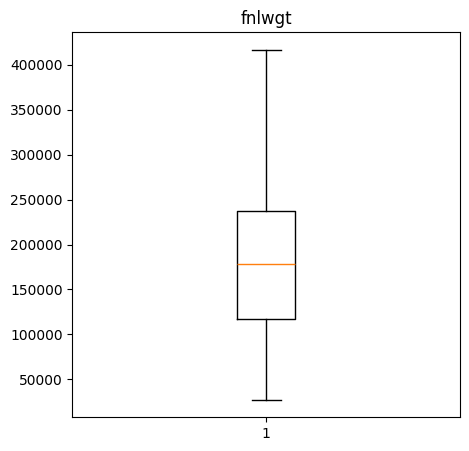

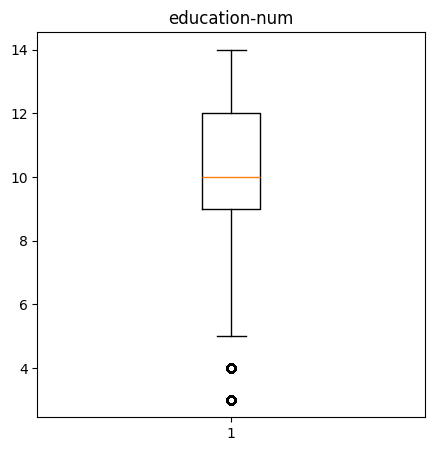

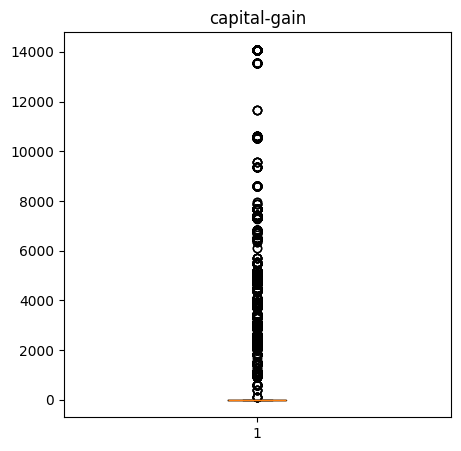

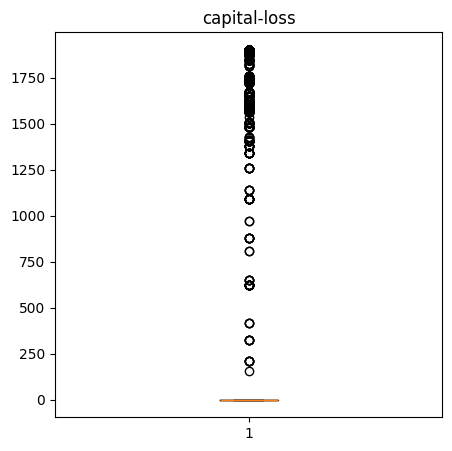

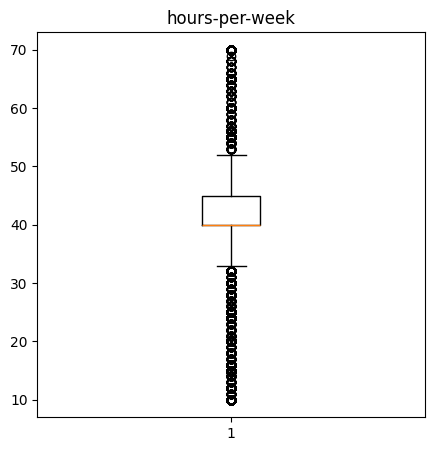

In [40]:
for i in num_cols1:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(num_cols1[i])

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48826 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48826 non-null  float64
 1   workclass       48826 non-null  object 
 2   fnlwgt          48826 non-null  int64  
 3   education       48826 non-null  object 
 4   education-num   48826 non-null  int64  
 5   marital-status  48826 non-null  object 
 6   occupation      48826 non-null  object 
 7   relationship    48826 non-null  object 
 8   race            48826 non-null  object 
 9   sex             48826 non-null  object 
 10  capital-gain    48826 non-null  int64  
 11  capital-loss    48826 non-null  int64  
 12  hours-per-week  48826 non-null  float64
 13  native-country  48826 non-null  object 
 14  income          48826 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ MB


In [42]:
df1['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [43]:
print(df1['sex'].unique())
print(df1['race'].unique())
print(df1['native-country'].unique())
print(df1['education'].unique())
print(df1['marital-status'].unique())
print(df1['relationship'].unique())

['Male' 'Female']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Germany' 'Iran' 'Philippines' 'Italy' 'Columbia'
 'Cambodia' 'Thailand' 'Canada' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'Poland' 'France'
 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']


ENCODING

In [44]:
la = LabelEncoder()
df1['sex'] = la.fit_transform(df1['sex'])

In [45]:
l = ['workclass','education','marital-status','occupation','relationship','race','native-country','income']
for i in l:
  freq_encoding = df1[i].value_counts()
  df1[i] = df1[i].map(freq_encoding)

In [46]:
df1.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,-0.180179,-0.076498,-0.050317,0.027786,-0.022262,0.058502,0.297746,0.032953,0.088618,0.122437,0.053517,0.084929,0.010730,-0.179980
workclass,-0.180179,1.000000,0.040263,0.059628,-0.159539,-0.065346,-0.044537,-0.115792,-0.003889,-0.066359,-0.057804,-0.034375,-0.100891,-0.042679,0.098191
fnlwgt,-0.076498,0.040263,1.000000,-0.012418,-0.038449,-0.002087,-0.012283,-0.017431,-0.050952,0.029614,-0.002950,-0.001871,-0.010908,-0.075361,0.005653
education,-0.050317,0.059628,-0.012418,1.000000,-0.093908,-0.034628,-0.163761,-0.034847,-0.001965,-0.019649,-0.078258,-0.029946,0.002014,0.109784,0.086951
education-num,0.027786,-0.159539,-0.038449,-0.093908,1.000000,0.090869,0.307618,0.100439,0.046807,0.004695,0.159806,0.078289,0.145502,0.124343,-0.248403
marital-status,-0.022262,-0.065346,-0.002087,-0.034628,0.090869,1.000000,0.001404,0.540089,0.091898,0.424384,0.087712,0.057798,0.131822,0.003145,-0.247079
occupation,0.058502,-0.044537,-0.012283,-0.163761,0.307618,0.001404,1.000000,-0.013686,0.021620,-0.091133,0.076244,0.035295,-0.041046,0.016367,-0.099430
relationship,0.297746,-0.115792,-0.017431,-0.034847,0.100439,0.540089,-0.013686,1.000000,0.142775,0.597724,0.106633,0.069661,0.266611,0.034596,-0.249530
race,0.032953,-0.003889,-0.050952,-0.001965,0.046807,0.091898,0.021620,0.142775,1.000000,0.098656,0.027846,0.020202,0.044087,0.186452,-0.065126
sex,0.088618,-0.066359,0.029614,-0.019649,0.004695,0.424384,-0.091133,0.597724,0.098656,1.000000,0.071878,0.047374,0.231514,-0.005939,-0.162592


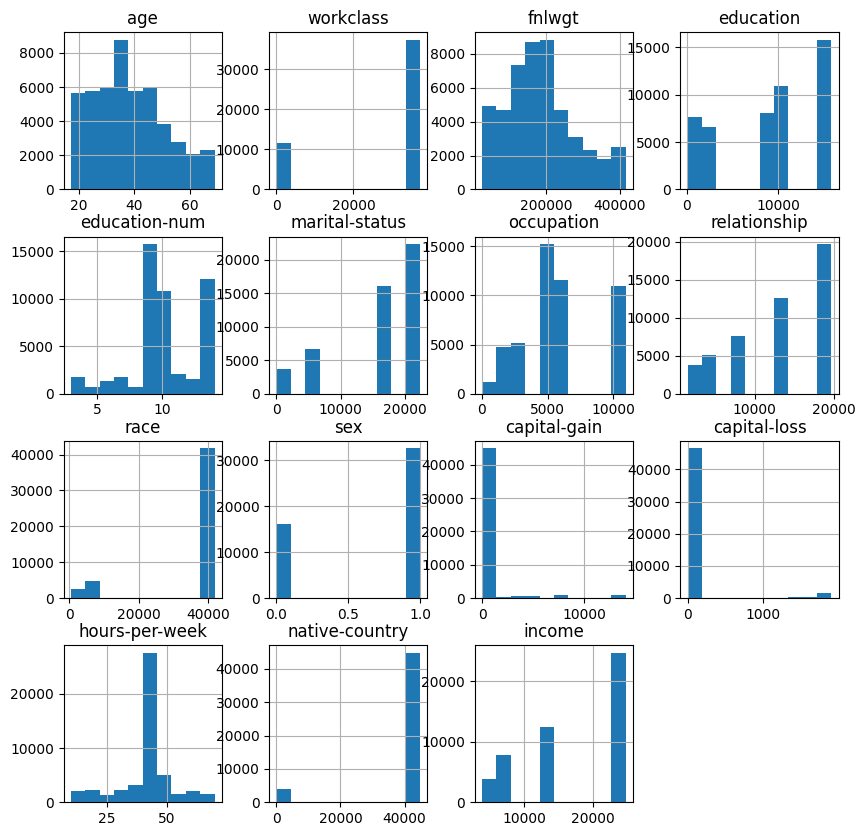

In [47]:
df1.hist(figsize=(10,10));

CLUSTERING

Text(0, 0.5, 'capital-loss')

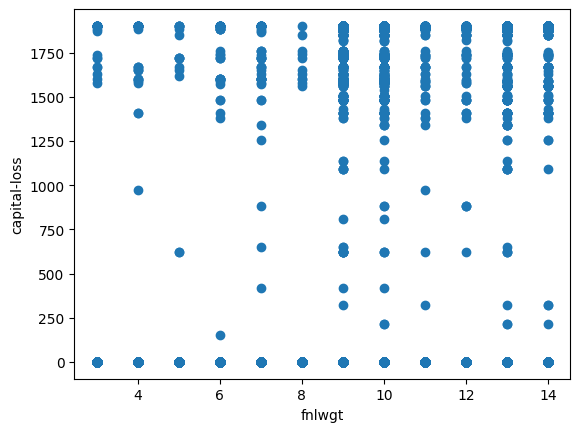

In [48]:
x = df1[['capital-gain','hours-per-week','education-num','capital-loss']]
plt.scatter(x['education-num'],x['capital-loss'])
plt.xlabel('fnlwgt')
plt.ylabel('capital-loss')

In [49]:
std = StandardScaler()
min = MinMaxScaler()

In [50]:
x[['capital-gain','hours-per-week','capital-loss','education-num'
   ]] = min.fit_transform(x[['capital-gain','hours-per-week','capital-loss','education-num']])

/tmp/ipython-input-2019264824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['capital-gain','hours-per-week','capital-loss','education-num'


In [51]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #   distance (or scores)calculated will be stored in the para,eter named inertia
wcss

[7511.196053421362,
 5585.859098849253,
 4337.04823174316,
 3397.155548912762,
 2350.6646974859,
 1698.9611349050526,
 1400.985057341317,
 1262.8515918581509,
 1176.1925219202992,
 1070.7083459846854]

Text(0.5, 0, 'Number of clusters')

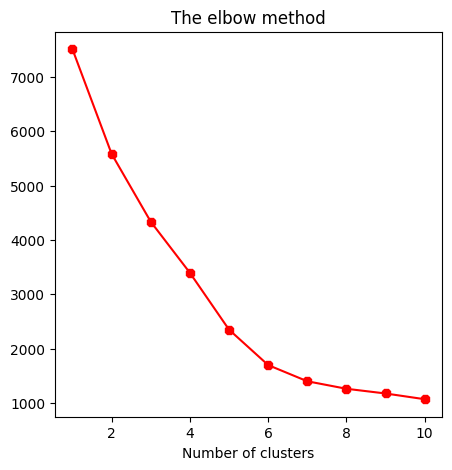

In [52]:
plt.figure(figsize=(5,5))
plt.plot(range(1,11),wcss,color='red',marker='8');
plt.title('The elbow method')
plt.xlabel('Number of clusters')

In [53]:
df2 = df1.copy()

In [54]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans.fit(x)
df2['Cluster'] = kmeans.predict(x)
df2.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,39.0,1877,77516,8021,13,16105,5328,12572,41747,1,2174,0,40.0,44869,24709,0
1,50.0,3649,83311,8021,13,22377,5770,19714,41747,1,0,0,13.0,44869,24709,3
2,38.0,37329,215646,15780,9,6631,1976,12572,41747,1,0,0,40.0,44869,24709,3
3,53.0,37329,234721,1812,7,22377,1976,19714,4685,1,0,0,40.0,44869,24709,1
4,28.0,37329,338409,8021,13,22377,10957,2331,4685,0,0,0,40.0,132,24709,0
5,37.0,37329,284582,2657,14,22377,5770,2331,41747,0,0,0,40.0,44869,24709,0
6,49.0,37329,160187,756,5,628,4654,12572,4685,0,0,0,16.0,102,24709,1
7,52.0,3649,209642,15780,9,22377,5770,19714,41747,1,0,0,45.0,44869,7841,3
8,31.0,37329,45781,2657,14,16105,10957,12572,41747,0,14084,0,50.0,44869,7841,4
9,42.0,37329,159449,8021,13,22377,5770,19714,41747,1,5178,0,40.0,44869,7841,0


In [55]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x)
score = silhouette_score(x,labels)
print(score)

0.4379947990888625


In [56]:
cluster_summary = df2.groupby('Cluster')[['age','occupation','hours-per-week','education-num','capital-gain','capital-loss']].mean()
print(cluster_summary)

               age   occupation  hours-per-week  education-num  capital-gain  \
Cluster                                                                        
0        39.388826  6979.216785       46.251129      12.719929    155.667688   
1        38.894803  4966.086495       36.723251       5.410897    143.872865   
2        41.464254  6346.418231       42.913315      10.899911      0.000000   
3        37.109484  5402.739467       37.534695       9.540094    141.987353   
4        45.232319  6951.010304       45.681967      11.949415  10868.303513   

         capital-loss  
Cluster                
0            0.596662  
1            0.778817  
2         1795.675603  
3            0.508570  
4            0.000000  


<Axes: xlabel='capital-gain', ylabel='education-num'>

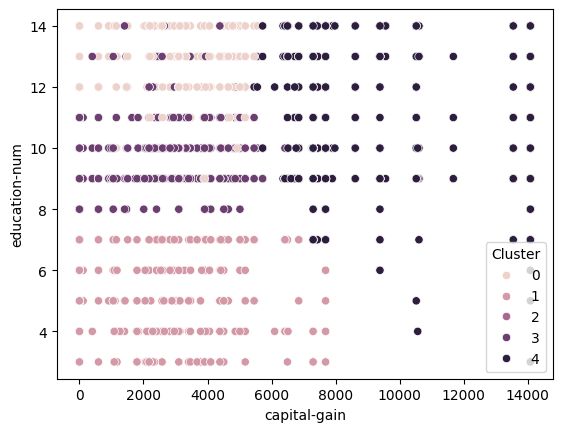

In [57]:
sns.scatterplot(x='capital-gain', y='education-num',hue='Cluster',data=df2)

In [58]:
cluster_label = {0:'highly educated, low gain',1:'high school education, low gain',
                 2:'medium educated, no gain,',3:'medium educated,low gain',4:'higly educated, high gain'}
df2['Cluster']= df2['Cluster'].map(cluster_label)
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster
0,39.0,1877,77516,8021,13,16105,5328,12572,41747,1,2174,0,40.0,44869,24709,"highly educated, low gain"
1,50.0,3649,83311,8021,13,22377,5770,19714,41747,1,0,0,13.0,44869,24709,"medium educated,low gain"
2,38.0,37329,215646,15780,9,6631,1976,12572,41747,1,0,0,40.0,44869,24709,"medium educated,low gain"
3,53.0,37329,234721,1812,7,22377,1976,19714,4685,1,0,0,40.0,44869,24709,"high school education, low gain"
4,28.0,37329,338409,8021,13,22377,10957,2331,4685,0,0,0,40.0,132,24709,"highly educated, low gain"


AGGLOMERATIVE HIERARCHICAL CLUSTERING

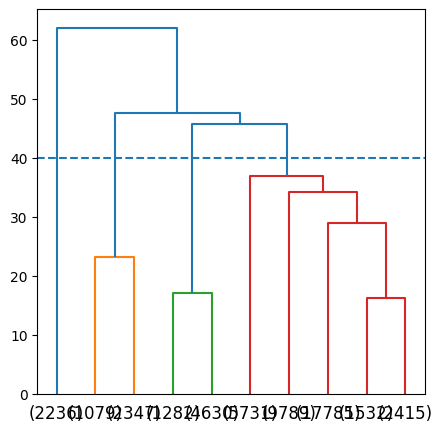

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(x,method='ward')
plt.figure(figsize=(5,5))
plt.axhline(y=40, ls='--')
dendrogram(mergings, truncate_mode='lastp', p=10) # Truncate to show the last 10 merged clusters
plt.show()

In [63]:
from sklearn.cluster import AgglomerativeClustering
agg_hc =AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
new_ = agg_hc.fit_predict(x)

In [64]:
score = silhouette_score(x,new_)
print("silhoutte score:",score)

silhoutte score: 0.4017683048735394


In [66]:
df2['agg_hc_result']=new_
df2.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,Cluster,agg_hc_result
0,39.0,1877,77516,8021,13,16105,5328,12572,41747,1,2174,0,40.0,44869,24709,"highly educated, low gain",2
1,50.0,3649,83311,8021,13,22377,5770,19714,41747,1,0,0,13.0,44869,24709,"medium educated,low gain",0
2,38.0,37329,215646,15780,9,6631,1976,12572,41747,1,0,0,40.0,44869,24709,"medium educated,low gain",0
3,53.0,37329,234721,1812,7,22377,1976,19714,4685,1,0,0,40.0,44869,24709,"high school education, low gain",1
4,28.0,37329,338409,8021,13,22377,10957,2331,4685,0,0,0,40.0,132,24709,"highly educated, low gain",0
5,37.0,37329,284582,2657,14,22377,5770,2331,41747,0,0,0,40.0,44869,24709,"highly educated, low gain",0
6,49.0,37329,160187,756,5,628,4654,12572,4685,0,0,0,16.0,102,24709,"high school education, low gain",1
7,52.0,3649,209642,15780,9,22377,5770,19714,41747,1,0,0,45.0,44869,7841,"medium educated,low gain",0
8,31.0,37329,45781,2657,14,16105,10957,12572,41747,0,14084,0,50.0,44869,7841,"higly educated, high gain",2
9,42.0,37329,159449,8021,13,22377,5770,19714,41747,1,5178,0,40.0,44869,7841,"highly educated, low gain",2


In [67]:
df2['income'].unique()

array([24709,  7841, 12430,  3846])

***Insights***

There were 4 classes in the income column. For clustering --- 5 clusterers has given best silhoutte score. Also for agglomerative clustering there are 4 clusters. For tax reformation, the cluster with medium education and no capital gain could be given some relaxation. While creating new schemes category with low education and low capital income cound be given more schemes. people with high education and high capital gain can be given a tax based on their capital income.